# Importing Data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (Dense, Dropout, Flatten,
                                     Conv2D, MaxPooling2D)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

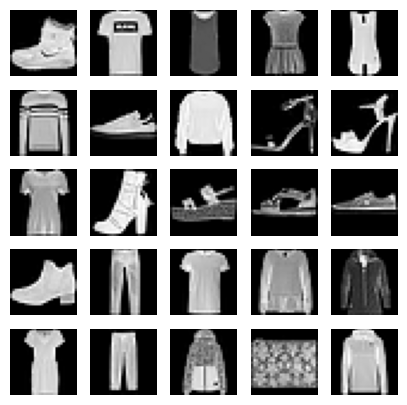

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# Preprocessing

In [4]:
# One-hot encoding for multi-class classification (ONLY ONE CLASS PER ITEM!!!!)
# Activation function for output: Softmax

# scale
x_train = x_train / 255.0
x_test  = x_test / 255.0

# one-hot coding
num_classes = 10
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test, num_classes)

In [5]:
# Callbacks:
early_stop = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True) # This callback monitors the validation accuracy (val_accuracy) during training. If the validation accuracy doesn't improve for 5 consecutive epochs (patience=5), training will stop early. restore_best_weights=True ensures that the model weights from the epoch with the best validation accuracy are restored.
reduce_lr  = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3) # this callback monitors the validation loss (val_loss). If the validation loss doesn't decrease for 3 consecutive epochs (patience=3), the learning rate of the optimizer will be reduced by a factor of 0.5 (factor=0.5). This helps the model to converge when the loss has plateaued.

# Task 1

In [6]:
# prevents overfitting by slightly modifying images
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
datagen.fit(x_train)

In [16]:
# Baseline NN model
mlp = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(num_classes, activation="softmax")
])

mlp.compile(optimizer=Adam(learning_rate=1e-3),
            loss="categorical_crossentropy",
            metrics=["accuracy"])

history_mlp = mlp.fit(
    x_train, y_train_oh,
    validation_split=0.1,
    epochs=30, batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

mlp_test_loss, mlp_test_acc = mlp.evaluate(x_test, y_test_oh, verbose=0)
print(f"MLP Test Accuracy: {mlp_test_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7155 - loss: 0.8299 - val_accuracy: 0.8468 - val_loss: 0.4310 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8463 - loss: 0.4448 - val_accuracy: 0.8587 - val_loss: 0.3903 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.3959 - val_accuracy: 0.8660 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8686 - loss: 0.3651 - val_accuracy: 0.8760 - val_loss: 0.3593 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8760 - loss: 0.3446 - val_accuracy: 0.8793 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8804 - loss: 0.3310 - val_accuracy: 0.8780 - val_loss: 0.3423 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3210 - 

In [18]:
# Baseline NN model Improvmnet
mlp2 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

mlp2.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
mlp2.fit(x_train, y_train_oh, validation_split=0.1, epochs=30, batch_size=128,
         callbacks=[early_stop, reduce_lr], verbose=1)
print("MLP2 Test Acc:", mlp2.evaluate(x_test, y_test_oh, verbose=0)[1])


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6737 - loss: 0.9084 - val_accuracy: 0.8453 - val_loss: 0.4216 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.4550 - val_accuracy: 0.8613 - val_loss: 0.3797 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8539 - loss: 0.4022 - val_accuracy: 0.8685 - val_loss: 0.3602 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8653 - loss: 0.3755 - val_accuracy: 0.8667 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3605 - val_accuracy: 0.8660 - val_loss: 0.3512 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3534 - val_accuracy: 0.8735 - val_loss: 0.3317 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8783 - loss: 0.3330 -

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9280 - loss: 0.1860 - val_accuracy: 0.8987 - val_loss: 0.3035 - learning_rate: 6.2500e-05
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9331 - loss: 0.1805 - val_accuracy: 0.8978 - val_loss: 0.3050 - learning_rate: 6.2500e-05
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9313 - loss: 0.1811 - val_accuracy: 0.8988 - val_loss: 0.3033 - learning_rate: 6.2500e-05
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9308 - loss: 0.1797 - val_accuracy: 0.8992 - val_loss: 0.3073 - learning_rate: 6.2500e-05
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9318 - loss: 0.1816 - val_accuracy: 0.8995 - val_loss: 0.3017 - learning_rate: 6.2500e-05
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9297 - loss: 0.1815 - val_accuracy: 0.8998 - val_loss: 0.3053 - learning_rate: 6.2500e-05
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

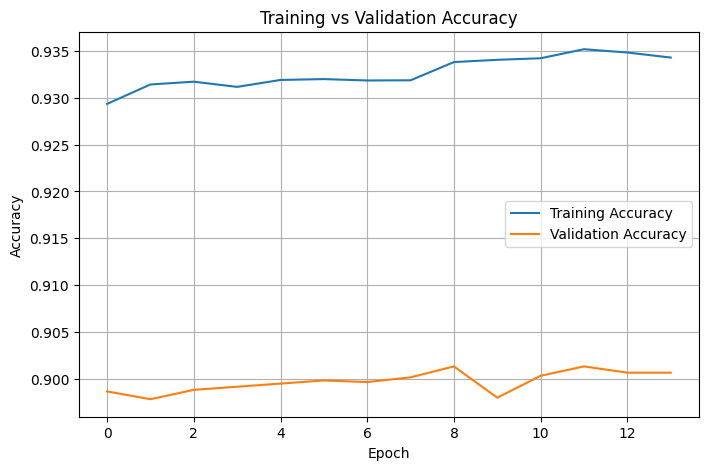

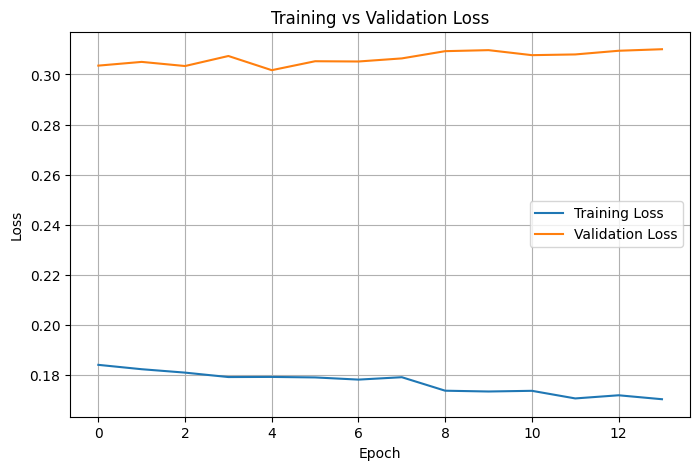

In [19]:
history_mlp2 = mlp2.fit(
    x_train, y_train_oh,
    validation_split=0.1,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8,5))
plt.plot(history_mlp2.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8,5))
plt.plot(history_mlp2.history['loss'], label='Training Loss')
plt.plot(history_mlp2.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Task 2

In [10]:
cnn = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

cnn.compile(optimizer=Adam(1e-3),
            loss="categorical_crossentropy",
            metrics=["accuracy"])


use_aug = True
if use_aug:
    history_cnn = cnn.fit(datagen.flow(x_train, y_train_oh, batch_size=128),
                          validation_data=(x_test, y_test_oh),
                          epochs=30,
                          callbacks=[early_stop, reduce_lr], verbose=1)
else:
    history_cnn = cnn.fit(x_train, y_train_oh, validation_split=0.1,
                          epochs=30, batch_size=128,
                          callbacks=[early_stop, reduce_lr], verbose=1)

cnn_test_loss, cnn_test_acc = cnn.evaluate(x_test, y_test_oh, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.6268 - loss: 1.0207 - val_accuracy: 0.8118 - val_loss: 0.4830 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7861 - loss: 0.5768 - val_accuracy: 0.8487 - val_loss: 0.4141 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8041 - loss: 0.5198 - val_accuracy: 0.8508 - val_loss: 0.3948 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8208 - loss: 0.4808 - val_accuracy: 0.8666 - val_loss: 0.3509 - learning_rate: 0.0010
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8370 - loss: 0.4442 - val_accuracy: 0.8768 - val_loss: 0.3336 - learning_rate: 0.0010
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8433 - loss: 0.4258 - val_accuracy: 0.8750 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8516 - loss: 0.4044

In [11]:
# Model improvement
cnn2 = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

cnn2.compile(optimizer=Adam(1e-3),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

cnn2.fit(x_train, y_train_oh, validation_split=0.1, epochs=30, batch_size=128,
         callbacks=[early_stop, reduce_lr], verbose=1)
print("CNN2 Test Acc:", cnn2.evaluate(x_test, y_test_oh, verbose=0)[1])


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7206 - loss: 0.7702 - val_accuracy: 0.8763 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8816 - loss: 0.3284 - val_accuracy: 0.9053 - val_loss: 0.2512 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9022 - loss: 0.2700 - val_accuracy: 0.9183 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9186 - loss: 0.2272 - val_accuracy: 0.9153 - val_loss: 0.2199 - learning_rate: 0.0010
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9253 - loss: 0.2054 - val_accuracy: 0.9248 - val_loss: 0.2075 - learning_rate: 0.0010
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9346 - loss: 0.1786 - val_accuracy: 0.9255 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9412 - loss: 0.1606 

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9926 - loss: 0.0190 - val_accuracy: 0.9365 - val_loss: 0.3091 - learning_rate: 7.8125e-06
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9937 - loss: 0.0171 - val_accuracy: 0.9353 - val_loss: 0.3092 - learning_rate: 7.8125e-06
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9931 - loss: 0.0193 - val_accuracy: 0.9357 - val_loss: 0.3110 - learning_rate: 7.8125e-06
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9358 - val_loss: 0.3120 - learning_rate: 7.8125e-06
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9940 - loss: 0.0175 - val_accuracy: 0.9357 - val_loss: 0.3120 - learning_rate: 3.9063e-06
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9928 - loss: 0.0197 - val_accuracy: 0.9355 - val_loss: 0.3137 - learning_rate: 3.9063e-06


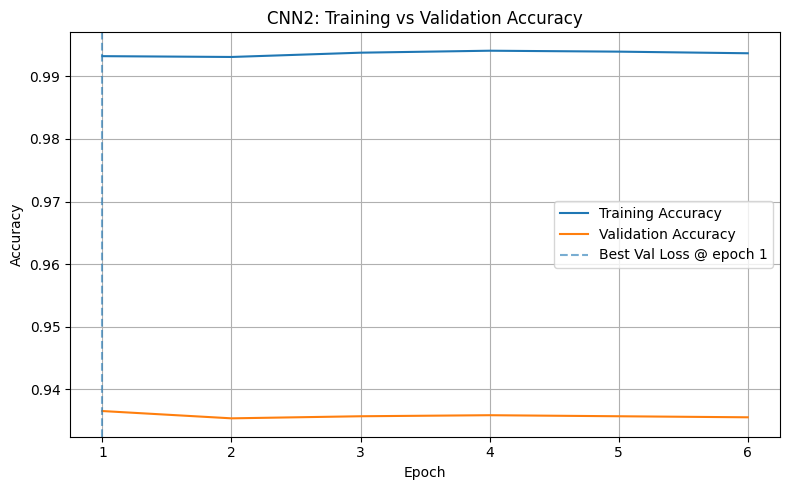

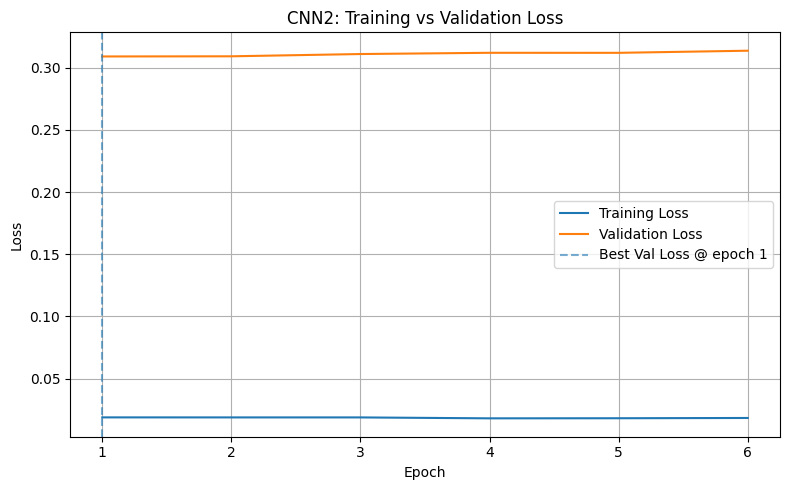

Final generalization gap (acc - val_acc): 0.0582


In [12]:
history_cnn2 = cnn2.fit(
    x_train, y_train_oh,
    validation_split=0.1,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


import numpy as np
import matplotlib.pyplot as plt

acc = history_cnn2.history['accuracy']
val_acc = history_cnn2.history['val_accuracy']
loss = history_cnn2.history['loss']
val_loss = history_cnn2.history['val_loss']
epochs = range(1, len(acc) + 1)

best_val_loss_epoch = int(np.argmin(val_loss)) + 1

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.axvline(best_val_loss_epoch, linestyle='--', alpha=0.6,
            label=f'Best Val Loss @ epoch {best_val_loss_epoch}')
plt.title('CNN2: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.axvline(best_val_loss_epoch, linestyle='--', alpha=0.6,
            label=f'Best Val Loss @ epoch {best_val_loss_epoch}')
plt.title('CNN2: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: quick numeric check of generalization gap at the end
final_gap = float(acc[-1] - val_acc[-1])
print(f"Final generalization gap (acc - val_acc): {final_gap:.4f}")


# Task 3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

def train_with_optimizer(model_fn, optimizer, lr):
    model = model_fn()
    model.compile(optimizer=optimizer(learning_rate=lr),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    model.fit(x_train, y_train_oh, validation_split=0.1, epochs=20, batch_size=128,
              callbacks=[early_stop, reduce_lr], verbose=0)
    return model.evaluate(x_test, y_test_oh, verbose=0)[1]


def cnn_factory():
    m = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])
    return m


results = {}
results["Adam 0.0001"] = train_with_optimizer(cnn_factory, Adam, 0.0001)
results["Adam 0.00003"] = train_with_optimizer(cnn_factory, Adam, 0.00003)
results["Adam 0.00005"] = train_with_optimizer(cnn_factory, Adam, 0.00005)
results["SGD 0.01"]  = train_with_optimizer(cnn_factory, SGD, 0.01)
results["SGD 0.03"]  = train_with_optimizer(cnn_factory, SGD, 0.03)
results["SGD 0.05"]  = train_with_optimizer(cnn_factory, SGD, 0.05)
results["RMSProp 0.01"]  = train_with_optimizer(cnn_factory, RMSprop, 0.001)
results["RMSProp 0.03"]  = train_with_optimizer(cnn_factory, RMSprop, 0.0003)
results["RMSProp 0.05"]  = train_with_optimizer(cnn_factory, RMSprop, 0.0005)

for key, value in results.items():
    print(f"{key}: {value}\n")

In [ ]:
def train_with_optimizer(model_fn, optimizer, lr):
    model = model_fn()
    model.compile(optimizer=optimizer(learning_rate=lr),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    model.fit(x_train, y_train_oh, validation_split=0.1, epochs=20, batch_size=128,
              callbacks=[early_stop, reduce_lr], verbose=0)
    return model.evaluate(x_test, y_test_oh, verbose=0)[1]


def cnn_factory():
    m = Sequential([
        Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(28,28,1)),
        Conv2D(32, (3,3), activation="relu", padding="same"),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation="relu", padding="same"),
        Conv2D(64, (3,3), activation="relu", padding="same"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
    ])
    return m

def train_with_optimizer_callbacks(model_fn, optimizer):
    model = model_fn()
    model.compile(optimizer=optimizer(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(
        x_train, y_train_oh,
        validation_split=0.1,
        epochs=30,
        batch_size=128,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test_oh, verbose=0)
    return test_acc

optimizers = [Adam, SGD, RMSprop]
results = {}

for opt in optimizers:
    name = opt.__name__
    print(f"\nTraining with {name}...")
    results[name] = train_with_optimizer_callbacks(cnn_factory, opt)

for key, value in results.items():
    print(f"{key}: {value:.4f}")

best_opt = max(results, key=results.get)
print(f"\n✅ Best optimizer: {best_opt} with accuracy {results[best_opt]:.4f}")